# Caracterización pacientes COVID-19

## Revisión de bases de datos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

In [8]:
#Lectura de bases de datos
data = pd.read_csv('../BD/base_final.csv', index_col=['Fecha'], sep=';')
data.drop(["total_cases", 'new_cases'], axis = 1, inplace = True)
data.head()

,stringency_index,total_tests,new_tests,new_deaths,total_deaths,Recuperados,Muertos,F,M,"[ 0, 20)",...,"[ 60, 80)","[ 80,100)","[100,112]",Susceptibles,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Fecha,,,,,,,,,,,,,,,,,,,,,
7/03/2020,12.04,810,71,0,0,0,0,0,0,0,...,0,0,0,50882883,3.0,5.0,-4.0,4.0,10,0
8/03/2020,12.04,813,3,0,0,0,0,0,0,0,...,0,0,0,50882884,6.0,5.0,-3.0,1.0,4,1
9/03/2020,14.81,851,38,0,0,0,0,1,1,0,...,0,0,0,50882884,-5.0,-1.0,-9.0,8.0,16,-1
10/03/2020,14.81,927,76,0,0,0,0,0,0,0,...,0,0,0,50882881,-7.0,-2.0,-9.0,13.0,18,-1
11/03/2020,14.81,1133,206,0,0,0,0,4,2,0,...,0,1,0,50882884,-8.0,-3.0,-7.0,8.0,14,-2


In [10]:
#Cantidad de variables iniciales
data.columns

Index(['stringency_index', 'total_tests', 'new_tests', 'new_deaths',
       'total_deaths', 'Recuperados', 'Muertos', 'F', 'M', '[  0, 20)',
       '[ 20, 40)', '[ 40, 60)', '[ 60, 80)', '[ 80,100)', '[100,112]',
       'Susceptibles', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [4]:
#Limpieza del dataset
pd.isnull(data).any()

stringency_index                                      False
total_tests                                           False
new_tests                                             False
new_deaths                                            False
total_deaths                                          False
Recuperados                                           False
Muertos                                               False
F                                                     False
M                                                     False
[  0, 20)                                             False
[ 20, 40)                                             False
[ 40, 60)                                             False
[ 60, 80)                                             False
[ 80,100)                                             False
[100,112]                                             False
Susceptibles                                          False
retail_and_recreation_percent_change_fro

In [5]:
data.fillna(method='ffill', inplace=True)
pd.isnull(data).any()

stringency_index                                      False
total_tests                                           False
new_tests                                             False
new_deaths                                            False
total_deaths                                          False
Recuperados                                           False
Muertos                                               False
F                                                     False
M                                                     False
[  0, 20)                                             False
[ 20, 40)                                             False
[ 40, 60)                                             False
[ 60, 80)                                             False
[ 80,100)                                             False
[100,112]                                             False
Susceptibles                                          False
retail_and_recreation_percent_change_fro

In [6]:
#Descripcióny validación de variables
data.describe()

,stringency_index,total_tests,new_tests,new_deaths,total_deaths,Recuperados,Muertos,F,M,"[ 0, 20)",...,"[ 60, 80)","[ 80,100)","[100,112]",Susceptibles,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,203.000000,2.030000e+02,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,2.030000e+02,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,79.248424,9.834273e+05,15920.000000,122.778325,6336.354680,3386.418719,133.955665,1943.487685,2006.960591,395.413793,...,484.029557,106.674877,0.768473,5.068829e+07,-59.965517,-37.591133,-51.837438,-57.192118,-39.389163,21.463054
std,16.959272,1.044015e+06,12300.270102,122.348695,8025.998425,4329.642326,122.784537,2054.655201,2041.176592,407.198502,...,497.670125,110.023052,1.190137,2.512793e+05,17.308322,16.949118,15.599828,17.394592,20.616519,8.046423
min,12.040000,8.100000e+02,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.009206e+07,-90.000000,-75.000000,-82.000000,-88.000000,-85.000000,-2.000000
25%,84.260000,8.900250e+04,4026.000000,11.500000,238.000000,98.000000,14.000000,126.000000,144.500000,32.000000,...,40.000000,7.500000,0.000000,5.054254e+07,-69.500000,-47.000000,-60.500000,-66.000000,-54.500000,17.000000
50%,87.040000,5.199900e+05,13738.000000,73.000000,1726.000000,1103.000000,112.000000,898.000000,1118.000000,221.000000,...,222.000000,58.000000,0.000000,5.082982e+07,-64.000000,-43.000000,-55.000000,-56.000000,-37.000000,20.000000
75%,87.040000,1.781804e+06,25354.000000,221.000000,11469.500000,6134.500000,243.000000,3649.000000,3697.500000,700.000000,...,903.500000,205.000000,1.000000,5.087762e+07,-50.500000,-26.000000,-42.000000,-53.000000,-30.000000,26.000000
max,90.740000,3.232499e+06,41434.000000,400.000000,24924.000000,16359.000000,380.000000,9077.000000,8441.000000,1833.000000,...,1973.000000,413.000000,7.000000,5.088288e+07,6.000000,13.000000,-3.000000,13.000000,18.000000,42.000000


# Análisis exploratorio

## Matriz de correlacion

In [105]:
data_t = transpose(data)
data_t
indices = data_t.index
indices

Index(['stringency_index', 'total_tests', 'new_tests', 'new_deaths',
       'total_deaths', 'Recuperados', 'Muertos', 'F', 'M', '[  0, 20)',
       '[ 20, 40)', '[ 40, 60)', '[ 60, 80)', '[ 80,100)', '[100,112]',
       'Susceptibles', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

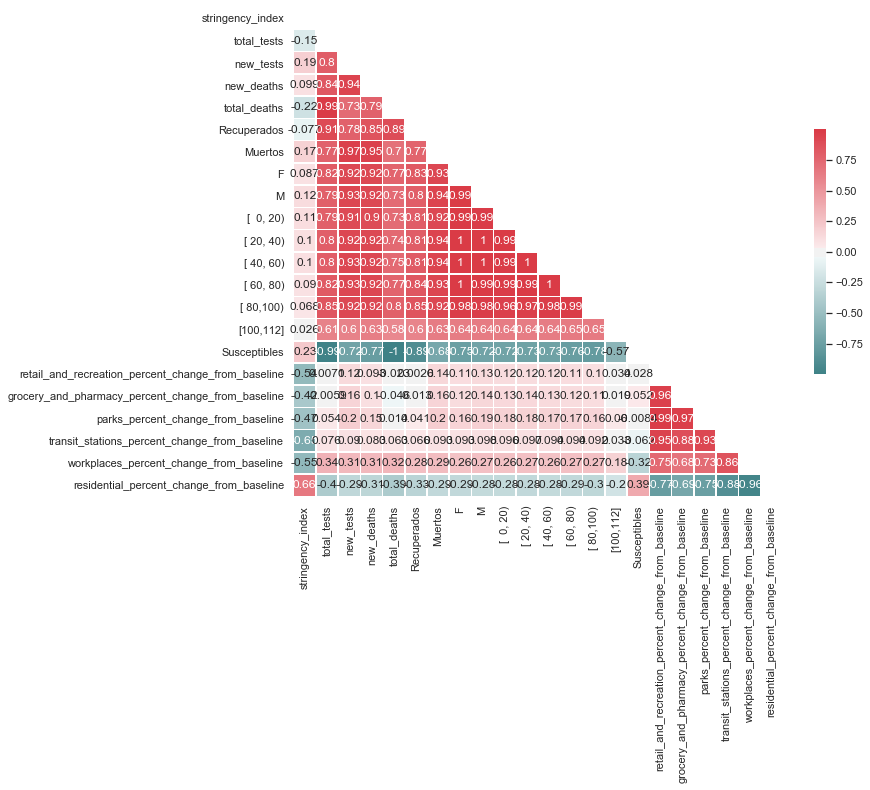

In [88]:
R = corrcoef(data_t)
R
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, 
            square=True,  xticklabels=indices, yticklabels=indices,
           linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)

### Eleccion de variables relevantes por DT

In [70]:
#Eliminación de variable depeniente
#train.drop(['total_cases'], axis==1, inplace=True)
train.drop(['new_cases'], axis=1, inplace=True)

In [71]:
train.head()

,stringency_index,total_tests,new_tests,new_deaths,total_deaths,total_cases,Recuperados,Muertos,F,M,...,"[ 60, 80)","[ 80,100)","[100,112]",Susceptibles,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-03-07T00:00:00Z,12.04,810,71,0,0,1,0,0,0,0,...,0,0,0,50882883,3.0,5.0,-4.0,4.0,10,0
2020-03-08T00:00:00Z,12.04,813,3,0,0,0,0,0,0,0,...,0,0,0,50882884,6.0,5.0,-3.0,1.0,4,1
2020-03-09T00:00:00Z,14.81,851,38,0,0,0,0,0,1,1,...,0,0,0,50882884,-5.0,-1.0,-9.0,8.0,16,-1
2020-03-10T00:00:00Z,14.81,927,76,0,0,3,0,0,0,0,...,0,0,0,50882881,-7.0,-2.0,-9.0,13.0,18,-1
2020-03-11T00:00:00Z,14.81,1133,206,0,0,0,0,0,4,2,...,0,1,0,50882884,-8.0,-3.0,-7.0,8.0,14,-2


In [80]:
#Algoritmo de DT para extracción de variables relevantes
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mae', max_depth=10, random_state=0)
regressor.fit(train.drop(['total_cases'], axis=1), train['total_cases'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [77]:
selected_features = ['stringency_index', 'total_tests', 'new_tests', 'new_deaths',
       'total_deaths', 'Recuperados', 'Muertos', 'F', 'M',
       '[  0, 20)', '[ 20, 40)', '[ 40, 60)', '[ 60, 80)', '[ 80,100)',
       '[100,112]', 'Susceptibles',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

In [81]:
#1.2 Model construction
regressor.fit(train.drop(['total_cases'], axis=1), train['total_cases'])
print ('Feature Relevances')
pd.DataFrame({'Attributes': selected_features,
              'Decision Tree': regressor.feature_importances_})

Feature Relevances


,Attributes,Decision Tree
0,stringency_index,0.000000
1,total_tests,0.852643
2,new_tests,0.008605
3,new_deaths,0.002090
4,total_deaths,0.063155
5,Recuperados,0.002116
6,Muertos,0.001569
7,F,0.001271
8,M,0.001325
9,"[ 0, 20)",0.000442


### Análisis de componentes principales

In [ ]:
# NORMALIZACION
from sklearn.preprocessing import StandardScaler, RobustScaler
robust_scaler = RobustScaler()
data_norm_t = robust_scaler.fit_transform(data)
data_norm_t

In [158]:
#ACP con 4 componentes iniciales paara ver resultados
from sklearn.decomposition import PCA
estimator_2 = PCA(n_components=4)
data_2_PCA = estimator_2.fit_transform(data_norm_t)
data_2_PCA

array([[ 2.51741993e+01, -1.76322685e+00, -2.38881971e+00,
         4.25061668e-01],
       [ 2.51268016e+01, -1.83026721e+00, -2.26723762e+00,
         4.62853436e-01],
       [ 2.42105058e+01, -1.68846277e+00, -2.45131995e+00,
         3.45054663e-01],
       [ 2.42621929e+01, -1.63933831e+00, -2.61238039e+00,
         3.35755211e-01],
       [ 2.42032621e+01, -1.68940566e+00, -2.39725864e+00,
         3.32955351e-01],
       [ 1.73330105e+01, -1.30128972e+00, -3.53928947e+00,
         2.57479337e-01],
       [ 1.73712584e+01, -1.25030561e+00, -3.68536006e+00,
         2.49344747e-01],
       [ 1.72479440e+01, -1.39475891e+00, -3.34458300e+00,
         3.03926829e-01],
       [ 1.70551065e+01, -1.62819074e+00, -2.63963288e+00,
         3.10788389e-01],
       [ 1.31116046e+01, -1.44380841e+00, -3.23558993e+00,
         2.84033224e-01],
       [ 1.10013483e+01, -1.52752587e+00, -3.05761837e+00,
         2.91779477e-01],
       [ 1.08024496e+01, -1.76598657e+00, -2.29647570e+00,
      

In [159]:
#Con solo 3 componentes se obtiene una buena varianza, por lo que se escoge este método para selección de características
print(np.cumsum(estimator_2.explained_variance_ratio_))

[0.7951958  0.90974599 0.9687062  0.9828156 ]


In [160]:
pd.DataFrame(np.matrix.transpose(estimator_2.components_), columns=['PC-1', 'PC-2', 'PC-3', 'PC-4'], index=data.columns)

,PC-1,PC-2,PC-3,PC-4
stringency_index,-0.971415,0.066477,-0.197771,-0.011522
total_tests,0.015161,0.224767,0.126574,-0.131724
new_tests,-0.015114,0.227431,-0.002645,-0.095790
new_deaths,-0.007519,0.229987,0.033681,-0.094350
total_deaths,0.024877,0.243617,0.176864,-0.155089
Recuperados,0.009554,0.258725,0.130362,-0.140685
Muertos,-0.012983,0.211211,-0.001623,-0.055199
F,-0.006513,0.233631,0.034887,-0.083919
M,-0.008986,0.230029,0.019499,-0.067182
"[ 0, 20)",-0.008981,0.242026,0.024950,-0.075167


In [161]:
base_pca = pd.DataFrame(data_2_PCA, columns=['PC-1', 'PC-2', 'PC-3', 'PC-4'], index=data.index)
base_pca

,PC-1,PC-2,PC-3,PC-4
Fecha,,,,
2020-03-07T00:00:00Z,25.174199,-1.763227,-2.388820,0.425062
2020-03-08T00:00:00Z,25.126802,-1.830267,-2.267238,0.462853
2020-03-09T00:00:00Z,24.210506,-1.688463,-2.451320,0.345055
2020-03-10T00:00:00Z,24.262193,-1.639338,-2.612380,0.335755
2020-03-11T00:00:00Z,24.203262,-1.689406,-2.397259,0.332955
...,...,...,...,...
2020-09-21T00:00:00Z,10.021657,1.767583,3.022233,-0.892959
2020-09-22T00:00:00Z,10.038489,1.880361,3.058359,-0.966970
2020-09-23T00:00:00Z,10.015380,2.744598,3.296772,-0.223559


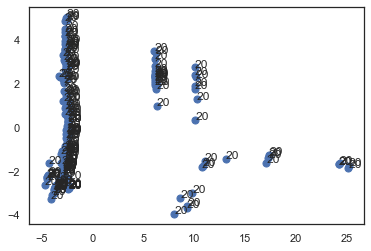

In [109]:
fig, ax = plt.subplots()
ax.scatter(data_2_PCA[:,0], data_2_PCA[:,1] ,s=50)

for i in range(0,len(data_2_PCA)):
    ax.annotate(data.iloc[i,:].name[0:2], (data_2_PCA[i,0], data_2_PCA[i,1]))

In [163]:
base_pca.to_csv('../../11MBIG/TFM/BD/base_pca.csv')

### Detección de outliers - DBSCAN

In [93]:
#MATRIZ DE DISTANCIAS
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(data_norm_t)

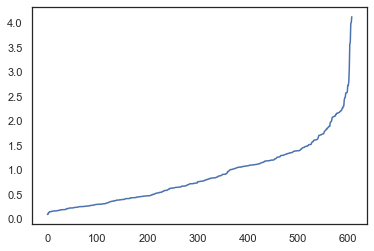

In [94]:
#Se inicializa con MinPts igual a 3
minPts=3
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(data_norm_t, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(data_norm_t):
    for j in range(len(data_norm_t)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(np.arange(0, 10000, 20))
#ax.set_yticks(np.arange(0,  20, 0.1))

plt.plot(seq)


plt.show()

In [95]:
#Parametrización del radio
from sklearn.cluster import DBSCAN

for eps in np.arange(0.30, 5.0, 0.10):
  db = DBSCAN(eps, min_samples=minPts).fit(data_norm_t)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print (eps, n_clusters_)
  

0.3 8
0.4 9
0.5 12
0.6000000000000001 13
0.7000000000000002 13
0.8000000000000003 15
0.9000000000000001 16
1.0000000000000002 15
1.1000000000000003 12
1.2000000000000004 9
1.3000000000000005 7
1.4000000000000004 6
1.5000000000000004 6
1.6000000000000005 6
1.7000000000000004 7
1.8000000000000005 7
1.9000000000000006 7
2.0000000000000004 7
2.1000000000000005 7
2.2000000000000006 7
2.3000000000000007 7
2.4000000000000004 7
2.5000000000000004 7
2.6000000000000005 7
2.7000000000000006 7
2.8000000000000007 7
2.900000000000001 7
3.000000000000001 7
3.1000000000000005 7
3.2000000000000006 7
3.3000000000000007 7
3.400000000000001 7
3.500000000000001 7
3.600000000000001 7
3.700000000000001 7
3.800000000000001 7
3.9000000000000012 7
4.000000000000001 7
4.100000000000001 5
4.200000000000001 5
4.300000000000002 4
4.400000000000001 4
4.500000000000001 4
4.600000000000001 4
4.700000000000001 4
4.800000000000002 4
4.900000000000001 3


In [102]:
#Elección del radio (eps)
db2 = DBSCAN(eps=3.9, min_samples=minPts).fit(data_norm_t)
labels_2 = db2.labels_
labels_2

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, -1,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6],
      dtype=int64)

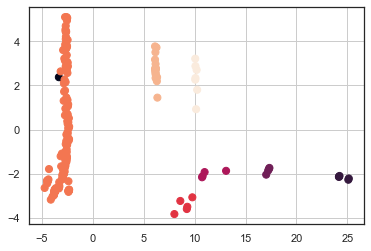

In [103]:
plt.scatter(data_2_PCA[:,0], data_2_PCA[:,1], c=labels_2,s=50)
plt.grid()
plt.show()

In [78]:
data['dbscan_group'] = labels_2

data[data['dbscan_group'] == -1].shape

(0, 25)

In [80]:
data.head()

,stringency_index,total_tests,new_tests,new_deaths,total_deaths,new_cases,total_cases,Recuperados,Muertos,F,...,"[ 80,100)","[100,112]",Susceptibles,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,dbscan_group
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-03-07T00:00:00Z,12.04,810,71,0,0,1,1,0,0,0,...,0,0,50882883,3.0,5.0,-4.0,4.0,10,0,0
2020-03-08T00:00:00Z,12.04,813,3,0,0,0,0,0,0,0,...,0,0,50882884,6.0,5.0,-3.0,1.0,4,1,0
2020-03-09T00:00:00Z,14.81,851,38,0,0,0,0,0,0,1,...,0,0,50882884,-5.0,-1.0,-9.0,8.0,16,-1,0
2020-03-10T00:00:00Z,14.81,927,76,0,0,2,3,0,0,0,...,0,0,50882881,-7.0,-2.0,-9.0,13.0,18,-1,0
2020-03-11T00:00:00Z,14.81,1133,206,0,0,0,0,0,0,4,...,1,0,50882884,-8.0,-3.0,-7.0,8.0,14,-2,0


# Análisis predictivo

### Modelo 1: KNN

In [2]:
#Se estima con la base de datos de ACP
base_pca=pd.read_csv('../../11MBIG/TFM/BD/base_pca.csv', sep=';')
base_pca.head()

,Fecha,PC-1,PC-2,PC-3,PC-4
0,7/03/2020,25.174199,-1.763227,-2.388820,0.425062
1,8/03/2020,25.126802,-1.830267,-2.267238,0.462853
2,9/03/2020,24.210506,-1.688463,-2.451320,0.345055
3,10/03/2020,24.262193,-1.639338,-2.612380,0.335755
4,11/03/2020,24.203262,-1.689406,-2.397259,0.332955


In [7]:
#Cargue de variables dependiente
target = pd.read_csv('../../11MBIG/TFM/BD/labels.csv', sep=';')
target.columns

Index(['Fecha', 'new_cases'], dtype='object')

In [8]:
target.describe()

,new_cases
count,203.000000
mean,3895.679803
std,3981.791818
min,0.000000
25%,255.500000
50%,2124.000000
75%,7407.000000
max,13056.000000


In [ ]:
#Unión de bases de datos (x, y)
import datetime

train = base_pca.merge(target, on=['Fecha'], how='inner')
#train['Fecha'] = train['year'].astype(str) + '-W' + train['weekofyear'].astype(str) + '-1'
train['Fecha'] = pd.to_datetime(train['Fecha'], format='%d/%m/%Y')
train.set_index('Fecha', inplace=True)
train.rename(columns={'new_cases':'target'}, inplace=True)

In [294]:
train.tail()

,PC-1,PC-2,PC-3,PC-4,target
Fecha,,,,,
2020-09-21,10.021657,1.767583,3.022233,-0.892959,6678
2020-09-22,10.038489,1.880361,3.058359,-0.966970,5359
2020-09-23,10.015380,2.744598,3.296772,-0.223559,7102
2020-09-24,10.035327,2.393044,3.296131,-0.125519,6731
2020-09-25,10.100060,0.332943,2.787251,-1.526407,6555


In [64]:
#División entre train y test (70-30)
test = train.loc['2020-08-01':'2020-09-25']
train  = train.loc[:'2020-07-31']


In [69]:
test.shape

(56, 5)

In [66]:
train.reset_index(drop = True, inplace = True)
train.head()

,PC-1,PC-2,PC-3,PC-4,target
0,25.174199,-1.763227,-2.388820,0.425062,1
1,25.126802,-1.830267,-2.267238,0.462853,0
2,24.210506,-1.688463,-2.451320,0.345055,0
3,24.262193,-1.639338,-2.612380,0.335755,2
4,24.203262,-1.689406,-2.397259,0.332955,0


Min Value uniform : 751.5647619047619 (4)
Min Value distance : 735.9969306448544 (4)


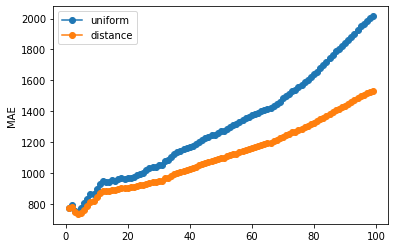

In [73]:
#Entrenamiento del modelo

from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

#cv = TimeSeriesSplit(n_splits=5) 
cv = KFold(n_splits = 10, shuffle = False) # Shaffle = F dado que es una serie de tiempo
# se podría utilizar https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,100):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['target'], axis=1), 
                               y = f_train['target'])
          y_pred = knn.predict(X = f_test.drop(['target'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['target'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [119]:
# Resultado de la parametrización y elección de K's y peso
n_neighbors = 20
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit, estimación y resultado

knn.fit( X = train.drop(['target'], axis=1), y = train['target'])
y_pred = knn.predict(X = test.drop(['target'], axis = 1))
mae = mean_absolute_error(test['target'], y_pred)
print ('MAE', mae)

MAE 3402.660714285714


C:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


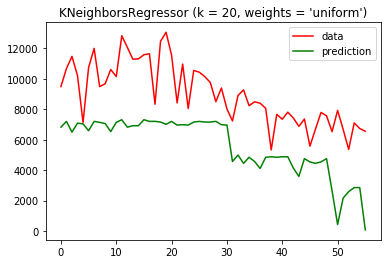

In [120]:
#Gráfico de estimación y datos reales

from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['target'].shape[0]))
plt.plot(xx, test['target'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

### Modelo 2: Random Forest

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [125]:
regressor = RandomForestRegressor() 
regressor

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [126]:
def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [127]:
#Hiperparametrización
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [6,4,2], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [128]:
#Fit utilizando el GridSearch
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 5)

grid_regres.fit(X = train.drop(['target'], axis=1), 
                           y = train['target'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [129]:
#Mejores resultados
report(grid_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: -18.800 (std: 33.113)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 64}

Model with rank: 2
Mean validation score: -18.801 (std: 33.112)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 64}

Model with rank: 3
Mean validation score: -18.801 (std: 33.112)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 128}

Model with rank: 4
Mean validation score: -18.802 (std: 33.112)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 32}

Model with rank: 5
Mean validation score: -18.803 (std: 33.111)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split'

In [234]:
# Hiperparametros elegidos
regressor =  RandomForestRegressor(n_estimators= best_est, criterion='mae', max_depth=5, max_features='auto',min_samples_leaf=2,
                                   random_state=0)
# Estimación

regressor.fit( X = train.drop(['target'], axis=1), y = train['target'])
y_pred = regressor.predict(X = test.drop(['target'], axis = 1))

C:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


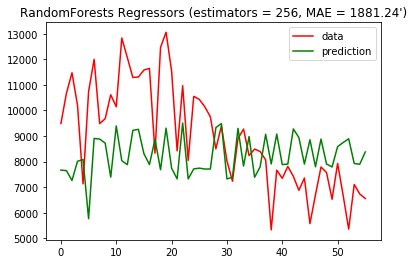

In [230]:
#Gráfica final de estimación y datos reales

from sklearn.metrics import mean_absolute_error
                  
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['target'].shape[0]))
plt.plot(xx, test['target'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressors (estimators = %i, MAE = %6.2f')" % (best_est, mae))

plt.show()

### Modelo 3: AdaBoost

In [236]:
#Hiperparametrización

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

param_dist = {
 "n_estimators": [8, 16, 32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1],
 "loss" : ['linear', 'square', 'exponential']
 }

grid_ada = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(criterion='mae')),
                        param_grid = param_dist, cv=5)

grid_ada.fit(X = train.drop(['target'], axis=1),y = train['target'])


best_ada = grid_ada.best_estimator_
print (best_ada)
# fit and predict
best_ada.fit( X = train.drop(['target'], axis=1), y = train['target'])
y_pred = best_ada.predict(X = test.drop(['target'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['target'], y_pred)
print ('MAE', mae)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mae',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [237]:
#Mejores resultados de parametros
report(grid_ada.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: -26.227 (std: 48.059)
Parameters: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 32}

Model with rank: 2
Mean validation score: -27.946 (std: 49.596)
Parameters: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 8}

Model with rank: 3
Mean validation score: -28.161 (std: 53.706)
Parameters: {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 16}

Model with rank: 4
Mean validation score: -28.292 (std: 48.802)
Parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 16}

Model with rank: 5
Mean validation score: -29.117 (std: 52.781)
Parameters: {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 8}



### Modelo 4: GradientBoost

In [238]:
#Hiperparametrización

from sklearn.ensemble import GradientBoostingRegressor

param_dist = {
 "n_estimators": [64, 128, 256, 512],
 "learning_rate" : [0.01,0.05,0.1],
  "max_features" : ["auto", "sqrt"],
 "loss" : ['ls', 'lad', 'huber', 'quantile'],
 "criterion": ['mae']
 }

grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid = param_dist, cv=5)

grid_gb.fit(X = train.drop(['target'], axis=1),y = train['target'])


best_gb = grid_gb.best_estimator_
print (best_gb)
# fit and predict
best_gb.fit( X = train.drop(['target'], axis=1), y = train['target'])
y_pred = best_gb.predict(X = test.drop(['target'], axis = 1))

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['target'], y_pred)
print ('MAE', mae)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.05, loss='huber', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=512,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MAE 1652.310024619475


In [241]:
#Mejores resultados de parametrización
report(grid_gb.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: -16.158 (std: 27.239)
Parameters: {'criterion': 'mae', 'learning_rate': 0.05, 'loss': 'huber', 'max_features': 'auto', 'n_estimators': 512}

Model with rank: 2
Mean validation score: -16.183 (std: 27.161)
Parameters: {'criterion': 'mae', 'learning_rate': 0.1, 'loss': 'huber', 'max_features': 'auto', 'n_estimators': 512}

Model with rank: 3
Mean validation score: -18.832 (std: 30.222)
Parameters: {'criterion': 'mae', 'learning_rate': 0.1, 'loss': 'ls', 'max_features': 'auto', 'n_estimators': 512}

Model with rank: 4
Mean validation score: -18.936 (std: 35.811)
Parameters: {'criterion': 'mae', 'learning_rate': 0.1, 'loss': 'lad', 'max_features': 'auto', 'n_estimators': 256}

Model with rank: 5
Mean validation score: -19.223 (std: 36.349)
Parameters: {'criterion': 'mae', 'learning_rate': 0.1, 'loss': 'lad', 'max_features': 'auto', 'n_estimators': 128}



#### Estimación y graficación de modelos 3 y 4

In [258]:
#Dados los mejores hiperparámetros se procede a realizar el fit y estimación para los modelos 3 y 4 
#(el modelo de DT no se tiene en cuenta dado que sus resultados no son óptimos)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor



# Fit de DT
regressors = []
regressors.append(DecisionTreeRegressor(max_depth=4, criterion='mae'))


# Fit de AdaBoost
regressors.append(AdaBoostRegressor(DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mae',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.1, loss='linear', n_estimators=32,
                  random_state=None))


#Fit de GradientBoost
regressors.append(GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.1, loss='huber', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=512,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False))

C:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


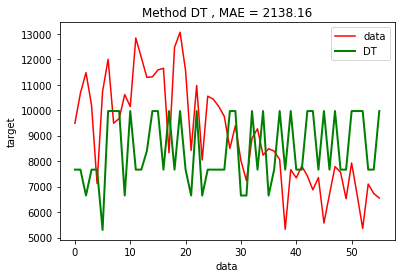

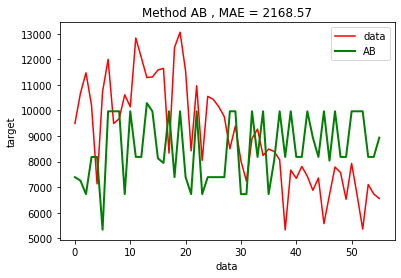

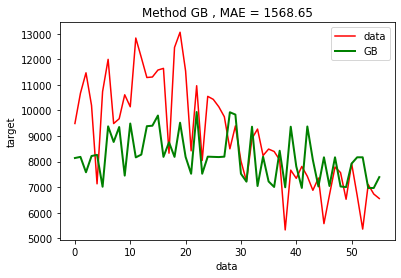

In [259]:
#Visualización de los modelos

xx = np.stack(i for i in range(len(test['target'])))
regr_names = ["DT", "AB", "GB"]

results = pd.DataFrame()
results['real'] = test['target']
               
for i, r in enumerate(regressors):
    r.fit( X = train.drop(['target'], axis=1), y = train['target'])
    y = r.predict(X = test.drop(['target'], axis = 1))
    results[regr_names[i]] = y
    mae = mean_absolute_error(test['target'],y)
    # Plot the results
    plt.figure()
    plt.plot(xx, test['target'], c='r', label='data')
    plt.plot(xx, y, c="g", label=regr_names[i], linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Method %s , MAE = %6.2f" % (regr_names[i], mae ))
    plt.axis('tight')
    plt.legend()
    plt.show()

### Modelo 5: LSTM

In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install keras==2.3.0

  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Dropout
from keras.optimizers import Adam

C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [269]:
# Importación de base de datos de entrenamiento
## se importan las primeras 178 observaciones que corresponden del 7 de marzo al 31 de agosto

dataset_train = pd.read_csv('../../11MBIG/TFM/BD/serie_final.csv', sep=';', nrows=178)

cols = list(dataset_train)[1:8]

# Extracción de fechas para visualización
datelist_train = list(dataset_train['Fecha'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))


Training set shape == (178, 6)
All timestamps == 178
Featured selected: ['target', 'PC-1', 'PC-2', 'PC-3', 'PC-4']


In [270]:
#se eliminan las comas de los nombres de las columnas
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

#se convierte la base a numeros flotantes para poder hacer los calculos
dataset_train = dataset_train.astype(float)

#se convirte la base en una matriz
training_set = dataset_train.values

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (178, 5).


array([[ 1.00000000e+00,  2.51741993e+01, -1.76322685e+00,
        -2.38881971e+00,  4.25061668e-01],
       [ 0.00000000e+00,  2.51268016e+01, -1.83026721e+00,
        -2.26723762e+00,  4.62853436e-01],
       [ 0.00000000e+00,  2.42105058e+01, -1.68846277e+00,
        -2.45131995e+00,  3.45054663e-01],
       [ 2.00000000e+00,  2.42621929e+01, -1.63933831e+00,
        -2.61238039e+00,  3.35755211e-01],
       [ 0.00000000e+00,  2.42032621e+01, -1.68940566e+00,
        -2.39725864e+00,  3.32955351e-01],
       [ 6.00000000e+00,  1.73330105e+01, -1.30128972e+00,
        -3.53928947e+00,  2.57479337e-01],
       [ 0.00000000e+00,  1.73712584e+01, -1.25030561e+00,
        -3.68536006e+00,  2.49344747e-01],
       [ 7.00000000e+00,  1.72479440e+01, -1.39475891e+00,
        -3.34458300e+00,  3.03926829e-01],
       [ 1.80000000e+01,  1.70551065e+01, -1.62819074e+00,
        -2.63963288e+00,  3.10788389e-01],
       [ 1.10000000e+01,  1.31116046e+01, -1.44380841e+00,
        -3.23558993e+00

In [271]:
# Normalización
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#escalar las variables
training_set_scaled = sc.fit_transform(training_set)

#escalar la variable dependiente
sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-0.85411974],
       [-0.85436989],
       [-0.85436989],
       [-0.85386958],
       [-0.85436989],
       [-0.85286897],
       [-0.85436989],
       [-0.85261881],
       [-0.84986713],
       [-0.8516182 ],
       [-0.85136805],
       [-0.85236866],
       [-0.84511421],
       [-0.8478659 ],
       [-0.84686528],
       [-0.84136191],
       [-0.84811605],
       [-0.83660899],
       [-0.83635883],
       [-0.83135576],
       [-0.84911666],
       [-0.84236252],
       [-0.8371093 ],
       [-0.83085546],
       [-0.83035515],
       [-0.82735331],
       [-0.81459548],
       [-0.83035515],
       [-0.82785361],
       [-0.81959855],
       [-0.83460776],
       [-0.83085546],
       [-0.80408903],
       [-0.78582782],
       [-0.81209394],
       [-0.79183151],
       [-0.79533365],
       [-0.8376096 ],
       [-0.83535822],
       [-0.82260039],
       [-0.82285054],
       [-0.82235024],
       [-0.80283826],
       [-0.80884195],
       [-0.81159363],
       [-0

In [273]:
# Se crea una estructura de datos con 3 timestamps y 30 días a pronosticar (el mes de septiembre)
X_train = []
y_train = []

n_future = 30   # Numero de días a predecir
n_past =  3    # Numero de días pasados a utilizar para el pronóstico

for i in range(n_past, len(training_set_scaled) - n_future +1):
  X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
  y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (146, 3, 4).
y_train shape == (146, 1).


In [275]:
# Inicialización de RNN - LSTM
model = Sequential()

#  LSTM layer 1
model.add(LSTM(units=75, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# LSTM layer 2
model.add(LSTM(units=10, return_sequences=False))

# Dropout -para evitar overfitting
model.add(Dropout(0.4))

#  layer de salida
model.add(Dense(units=1, activation='linear'))

# Compilación de la Red Neural
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['accuracy'])

In [276]:
history = model.fit(X_train, y_train, shuffle=True, epochs=100,  validation_split=0.2, verbose=1, batch_size=1)

Train on 116 samples, validate on 30 samples
Epoch 1/100
116/116 [==============================] - 3s 29ms/step - loss: 0.3664 - accuracy: 0.0000e+00 - val_loss: 0.9712 - val_accuracy: 0.0000e+00
Epoch 2/100
116/116 [==============================] - 1s 9ms/step - loss: 0.2798 - accuracy: 0.0000e+00 - val_loss: 0.4261 - val_accuracy: 0.0000e+00
Epoch 3/100
116/116 [==============================] - 1s 9ms/step - loss: 0.2502 - accuracy: 0.0000e+00 - val_loss: 1.1591 - val_accuracy: 0.0000e+00
Epoch 4/100
116/116 [==============================] - 1s 9ms/step - loss: 0.2109 - accuracy: 0.0000e+00 - val_loss: 0.5316 - val_accuracy: 0.0000e+00
Epoch 5/100
116/116 [==============================] - 1s 9ms/step - loss: 0.2515 - accuracy: 0.0000e+00 - val_loss: 0.5607 - val_accuracy: 0.0000e+00
Epoch 6/100
116/116 [==============================] - 1s 9ms/step - loss: 0.2205 - accuracy: 0.0000e+00 - val_loss: 0.6523 - val_accuracy: 0.0000e+00
Epoch 7/100
116/116 [===========================

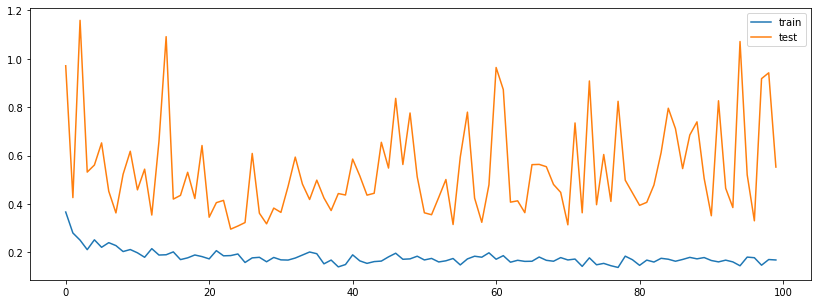

In [277]:
# plot de pérdidas
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [279]:
# Generación de lista de días para pronóstico
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

# Conversión de objeto Datetime para conversión final
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [280]:
# Estimación
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [ ]:
# Inversa de las predicciones para obtener las medidas originales

def datetime_to_timestamp(x):
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)


In [289]:
#Cargue de base original para el plot final
dataset_train = pd.read_csv('../../11MBIG/TFM/BD/nueva_base_final.csv', sep=';', nrows=178)
dataset_train['Fecha'] = pd.to_datetime(dataset_train['Fecha'], format='%Y/%m/%d')
dataset_train.set_index('Fecha', inplace=True)
dataset_train.head()

,total_tests,total_deaths,Recuperados,F,M,Susceptibles,target
Fecha,,,,,,,
2020-03-07,810,0,0,0,0,50882883,1
2020-03-08,813,0,0,0,0,50882884,0
2020-03-09,851,0,0,1,1,50882884,0
2020-03-10,927,0,0,0,0,50882881,2
2020-03-11,1133,0,0,4,2,50882884,0


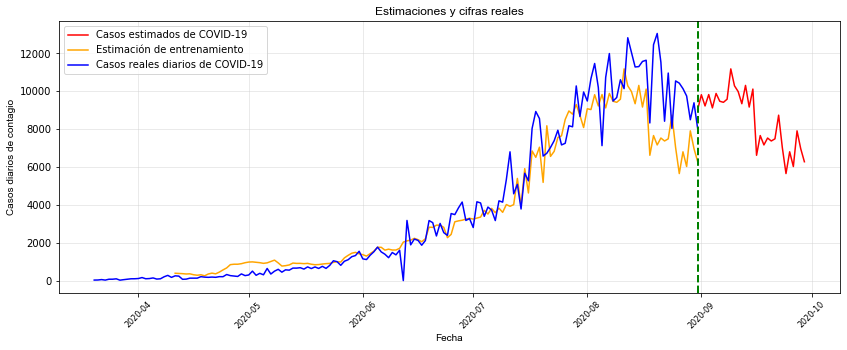

In [291]:
#Plot final de estimación y valores reales
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2020-03-20'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Casos estimados de COVID-19')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Open'], color='orange', label='Estimación de entrenamiento')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['target'], color='b', label='Casos reales diarios de COVID-19')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=False, loc='upper left')
plt.title('Estimaciones y cifras reales', family='Arial', fontsize=12)
plt.xlabel('Fecha', family='Arial', fontsize=10)
plt.ylabel('Casos diarios de contagio', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [ ]:
#Cargue de base de datos de test
test = pd.read_excel('../../11MBIG/TFM/BD/test.xlsx', index_col='date')

In [298]:
#Resultado final de MAE
mae = mean_absolute_error(test.loc['2020-09-01':'2020-09-29'], PREDICTIONS_FUTURE.loc['2020-09-01':'2020-09-29'])
print('Test MAE: %.3f' % mae)

Test MAE: 1496.775


# Estimación final con mejor modelo - LSTM

In [299]:
#Estimación con el dataset completo
dataset_train = pd.read_csv('../../11MBIG/TFM/BD/serie_final.csv', sep=';')
cols = list(dataset_train)[1:8]
datelist_train = list(dataset_train['Fecha'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))


Training set shape == (203, 6)
All timestamps == 203
Featured selected: ['target', 'PC-1', 'PC-2', 'PC-3', 'PC-4']


In [300]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

training_set = dataset_train.values

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (203, 5).


array([[ 1.00000000e+00,  2.51741993e+01, -1.76322685e+00,
        -2.38881971e+00,  4.25061668e-01],
       [ 0.00000000e+00,  2.51268016e+01, -1.83026721e+00,
        -2.26723762e+00,  4.62853436e-01],
       [ 0.00000000e+00,  2.42105058e+01, -1.68846277e+00,
        -2.45131995e+00,  3.45054663e-01],
       ...,
       [ 7.10200000e+03,  1.00153801e+01,  2.74459781e+00,
         3.29677180e+00, -2.23558610e-01],
       [ 6.73100000e+03,  1.00353269e+01,  2.39304399e+00,
         3.29613106e+00, -1.25518762e-01],
       [ 6.55500000e+03,  1.01000601e+01,  3.32942559e-01,
         2.78725129e+00, -1.52640677e+00]])

In [301]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-0.98054051],
       [-0.98079228],
       [-0.98079228],
       [-0.98028875],
       [-0.98079228],
       [-0.97928169],
       [-0.98079228],
       [-0.97902993],
       [-0.97626053],
       [-0.97802287],
       [-0.97777111],
       [-0.97877817],
       [-0.97147701],
       [-0.97424641],
       [-0.97323936],
       [-0.96770055],
       [-0.97449818],
       [-0.96291703],
       [-0.96266526],
       [-0.95762998],
       [-0.97550523],
       [-0.9687076 ],
       [-0.96342056],
       [-0.95712645],
       [-0.95662293],
       [-0.95360176],
       [-0.94076179],
       [-0.95662293],
       [-0.95410529],
       [-0.94579707],
       [-0.96090292],
       [-0.95712645],
       [-0.9301877 ],
       [-0.91180892],
       [-0.93824415],
       [-0.91785126],
       [-0.92137595],
       [-0.96392408],
       [-0.96165821],
       [-0.94881824],
       [-0.94907   ],
       [-0.94856648],
       [-0.92892888],
       [-0.93497121],
       [-0.93774062],
       [-0

In [302]:
X_train = []
y_train = []

n_future = 75   #Número de días a pronosticar
n_past =  3    # días pasados a utilizar para pronóstico

for i in range(n_past, len(training_set_scaled) - n_future +1):
  X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
  y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (126, 3, 4).
y_train shape == (126, 1).


In [303]:
model = Sequential()
model.add(LSTM(units=75, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))
model.add(LSTM(units=10, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_absolute_error', metrics=['accuracy'])

In [304]:
history = model.fit(X_train, y_train, shuffle=True, epochs=100,  validation_split=0.2, verbose=1, batch_size=1)

Train on 100 samples, validate on 26 samples
Epoch 1/100
100/100 [==============================] - 3s 32ms/step - loss: 0.5381 - accuracy: 0.0000e+00 - val_loss: 1.0609 - val_accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 1s 10ms/step - loss: 0.4205 - accuracy: 0.0000e+00 - val_loss: 1.0796 - val_accuracy: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 1s 10ms/step - loss: 0.4178 - accuracy: 0.0000e+00 - val_loss: 0.6042 - val_accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 1s 10ms/step - loss: 0.4246 - accuracy: 0.0000e+00 - val_loss: 0.8186 - val_accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 1s 10ms/step - loss: 0.3759 - accuracy: 0.0000e+00 - val_loss: 0.7861 - val_accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 1s 10ms/step - loss: 0.4033 - accuracy: 0.0000e+00 - val_loss: 0.7220 - val_accuracy: 0.0000e+00
Epoch 7/100
100/100 [======================

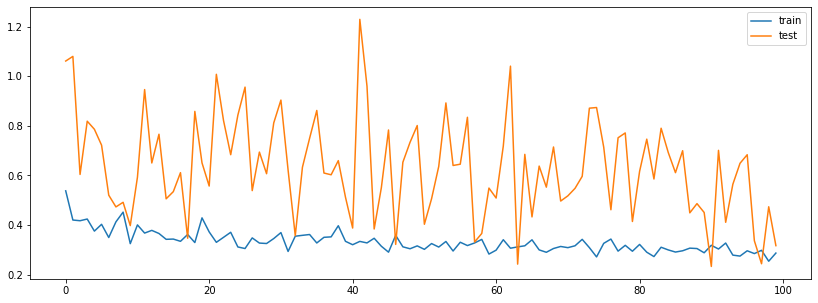

In [306]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [307]:
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [308]:
predictions_future = model.predict(X_train[-n_future:])
predictions_train = model.predict(X_train[n_past:])

In [ ]:
def datetime_to_timestamp(x):
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')

y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)


In [310]:
dataset_train = pd.read_csv('../../11MBIG/TFM/BD/nueva_base_final.csv', sep=';')
dataset_train['Fecha'] = pd.to_datetime(dataset_train['Fecha'], format='%Y/%m/%d')
dataset_train.set_index('Fecha', inplace=True)
dataset_train.head()

,total_tests,total_deaths,Recuperados,F,M,Susceptibles,target
Fecha,,,,,,,
2020-03-07,810,0,0,0,0,50882883,1
2020-03-08,813,0,0,0,0,50882884,0
2020-03-09,851,0,0,1,1,50882884,0
2020-03-10,927,0,0,0,0,50882881,2
2020-03-11,1133,0,0,4,2,50882884,0


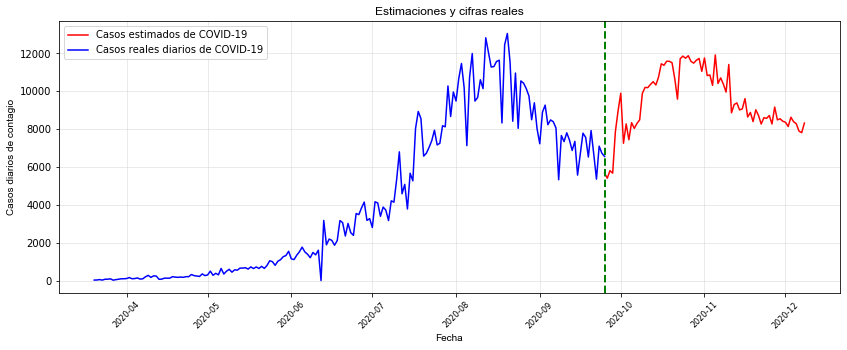

In [316]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

START_DATE_FOR_PLOTTING = '2020-03-20'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Casos estimados de COVID-19')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['target'], color='b', label='Casos reales diarios de COVID-19')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=False, loc='upper left')
plt.title('Estimaciones y cifras reales', family='Arial', fontsize=12)
plt.xlabel('Fecha', family='Arial', fontsize=10)
plt.ylabel('Casos diarios de contagio', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [317]:
PREDICTIONS_FUTURE.to_csv('../../11MBIG/TFM/BD/predicciones.csv')